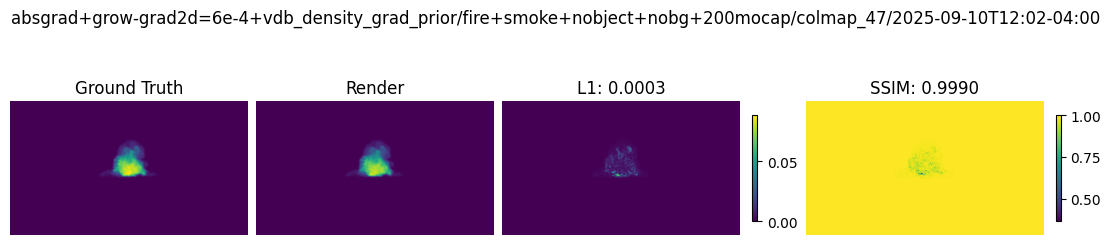

In [4]:
import itertools
from matplotlib.axes import Axes
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm, NoNorm, Normalize, SymLogNorm
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity


def transpose(iter):
    return zip(*iter)


def luminance(image: np.ndarray) -> np.ndarray:
    return 0.2126 * image[..., 0] + 0.7152 * image[..., 1] + 0.0722 * image[..., 2]


def identity(image: np.ndarray) -> np.ndarray:
    return image


def load_one(p, mapper=identity):
    im = plt.imread(p)  # H, W, C
    w = im.shape[1] // 2
    gt = im[:, :w]
    ren = im[:, w:]
    assert gt.shape == ren.shape, f"gt {gt.shape} != render {ren.shape}"
    return mapper(gt), mapper(ren)


def load_pair(lp, rp, mapper=identity):
    l = plt.imread(lp)  # H, W, C
    r = plt.imread(rp)  # H, W, C
    w = l.shape[1] // 2
    gt = l[:, :w]
    lren = l[:, w:]
    rren = r[:, w:]
    assert (
        gt.shape == lren.shape == rren.shape
    ), f"gt {gt.shape} != left render {lren.shape} != right render {rren.shape}"
    return mapper(gt), mapper(lren), mapper(rren)


for p in [
    "/home/aq85800/NewVolume/gsplat/absgrad+grow-grad2d=6e-4+vdb_density_grad_prior/fire+smoke+nobject+nobg+200mocap/colmap_47/2025-09-10T12:02-04:00/renders/val_step29999_0000.png",
    # "/home/aq85800/NewVolume/gsplat/compositing+blackbg+kernel=GAUSSIAN/teapot+box+blackbg+200mocap_bogusturquoise32e3+viewculling16/colmap_47/2025-08-29T12:02-04:00/renders/val_step29999_0000.png",
    # "/home/aq85800/NewVolume/gsplat/compositing+nobg+kernel=GAUSSIAN/teapot+box+nobg+200mocap_bogusturquoise32e3+viewculling16/colmap_47/2025-08-28T20:04-04:00/renders/val_step29999_0000.png",
    # "/home/aq85800/NewVolume/gsplat/kernel=EPANECH+rasterization=gsplat/cloud+small+noobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png",
]:
    fig = plt.figure(layout="constrained", figsize=(11, 3))
    fig.suptitle("/".join(p.split("/")[5:9]))
    axs = fig.subplot_mosaic([["gt", "ren", "l1", "ssim"]])
    gt, ren = load_one(p, mapper=luminance)
    l1 = np.abs(ren - gt)
    s, ssim = structural_similarity(gt, ren, data_range=ren.max() - ren.min(), full=True, channel_axis=-1)  # type: ignore
    ssim = np.abs(ssim)

    for ax in axs.values():
        ax.axis("off")

    axs["gt"].imshow(gt, aspect="equal")
    axs["gt"].set_title("Ground Truth")

    axs["ren"].imshow(ren, aspect="equal")
    axs["ren"].set_title("Render")

    l1cmap = axs["l1"].imshow(l1, aspect="equal")
    plt.colorbar(l1cmap, ax=axs["l1"], shrink=0.4)
    axs["l1"].set_title(f"L1: {np.mean(l1):.4f}")

    ssimcmap = axs["ssim"].imshow(ssim, aspect="equal")
    plt.colorbar(ssimcmap, ax=axs["ssim"], shrink=0.4)
    axs["ssim"].set_title(f"SSIM: {s:.4f}")

for l, r in [
    # (
    #     "/home/aq85800/NewVolume/gsplat/compositing+blackbg+kernel=GAUSSIAN/teapot+box+blackbg+200mocap_bogusturquoise32e3+viewculling16/colmap_47/2025-08-29T12:02-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/compositing+nobg+kernel=GAUSSIAN/teapot+box+nobg+200mocap_bogusturquoise32e3+viewculling16/colmap_47/2025-08-28T20:04-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/kernel=EPANECH+rasterization=gsplat/cloud+small+noobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/kernel=GAUSSIAN+rasterization=gsplat/cloud+small+noobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/kernel=EPANECH+rasterization=gsplat/fire+smoke+nobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/kernel=GAUSSIAN+rasterization=gsplat/fire+smoke+nobject+nobg+200mocap_bogus32e3+viewculling16+noiseupsample4/colmap_47/2025-08-25T16:00-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/vdb_density_grad_prior/cloud+small+noobject+nobg+200mocap/colmap_47/2025-09-08T15:07-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/absgrad+grow-grad2d=6e-4+vdb_density_grad_prior/cloud+small+noobject+nobg+200mocap/colmap_47/2025-09-10T12:02-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/vdb_density_grad_prior/fire+smoke+nobject+nobg+200mocap/colmap_47/2025-09-08T15:07-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/absgrad+grow-grad2d=6e-4+vdb_density_grad_prior/fire+smoke+nobject+nobg+200mocap/colmap_47/2025-09-10T12:02-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/vdb_density_grad_prior/teapot+box+nobg+200mocap/colmap_47/2025-09-08T15:07-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/absgrad+grow-grad2d=6e-4+vdb_density_grad_prior/teapot+box+nobg+200mocap/colmap_47/2025-09-10T12:02-04:00/renders/val_step29999_0000.png",
    # ),
    # (
    #     "/home/aq85800/NewVolume/gsplat/vdb_density_grad_prior/teapot+noobject+nobg+200mocap/colmap_47/2025-09-08T15:07-04:00/renders/val_step29999_0000.png",
    #     "/home/aq85800/NewVolume/gsplat/absgrad+grow-grad2d=6e-4+vdb_density_grad_prior/teapot+noobject+nobg+200mocap/colmap_47/2025-09-10T12:02-04:00/renders/val_step29999_0000.png",
    # ),
]:

    fig = plt.figure(layout="constrained", figsize=(11, 8.5))
    fig.suptitle("\nvs. ".join(["/".join(p.split("/")[5:9]) for p in (l, r)]))
    axs = fig.subplot_mosaic(
        [
            ["gt", "lren", "rren"],
            ["l1(l,r)", "l1(gt,l)", "l1(gt,r)"],
            ["ssim(l,r)", "ssim(gt,l)", "ssim(gt,r)"],
        ]
    )
    for ax in axs.values():
        ax.axis("off")

    gt, lren, rren = load_pair(l, r, mapper=luminance)
    l1s = {
        "l1(l,r)": np.abs(rren - lren),
        "l1(gt,l)": np.abs(lren - gt),
        "l1(gt,r)": np.abs(rren - gt),
    }

    ssims: dict[str, tuple[float, float]] = {
        "ssim(l,r)": structural_similarity(lren, rren, data_range=max(lren.max(), rren.max()) - min(lren.min(), rren.min()), full=True, channel_axis=-1),  # type: ignore
        "ssim(gt,l)": structural_similarity(gt, lren, data_range=max(gt.max(), lren.max()) - min(gt.min(), lren.min()), full=True, channel_axis=-1),  # type: ignore
        "ssim(gt,r)": structural_similarity(gt, rren, data_range=max(gt.max(), rren.max()) - min(gt.min(), rren.min()), full=True, channel_axis=-1),  # type: ignore
    }

    for k, im in zip(("gt", "lren", "rren"), (gt, lren, rren)):
        ax = axs[k]
        ax.set_title(k)
        cmap = ax.imshow(im, aspect="equal")
        plt.colorbar(cmap, ax=ax, shrink=0.4)

    for k, l1 in l1s.items():
        ax = axs[k]
        cmap = ax.imshow(l1, aspect="equal")
        ax.set_title(f"{k}: {np.mean(l1):.6f}")
        plt.colorbar(cmap, ax=ax, shrink=0.4)

    for k, ssim in ssims.items():
        ax = axs[k]
        cmap = ax.imshow(np.abs(ssim[1]), aspect="equal")
        ax.set_title(f"{k}: {ssim[0]:.6f}")
        plt.colorbar(cmap, ax=ax, shrink=0.4)